# **Transpose Convolution**
* **Basic concepts learnt from: A Deep understanding of Deep Learning (with Python intro) - Mark X Cohen (Udemy) - https://www.udemy.com/course/deeplearning_x**

In [1]:
# important libraries
import numpy as np
import torch as tr
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
# create a ConvTranspose2d class with parameters
# parameters
inChans=3 # RGB
outChans=15 
krnSize=5 # should be an odd number
stride=1
padding=0

# create the instance
c=nn.ConvTranspose2d(inChans,outChans,krnSize,stride,padding)

# let's have a look at it
print(c)
print()

# check out its weight tensors, what are its dimensions?
print(f'Size of weights: {c.weight.shape}')
print(f'Size of bias: {c.bias.shape}')

ConvTranspose2d(3, 15, kernel_size=(5, 5), stride=(1, 1))

Size of weights: torch.Size([3, 15, 5, 5])
Size of bias: torch.Size([15])


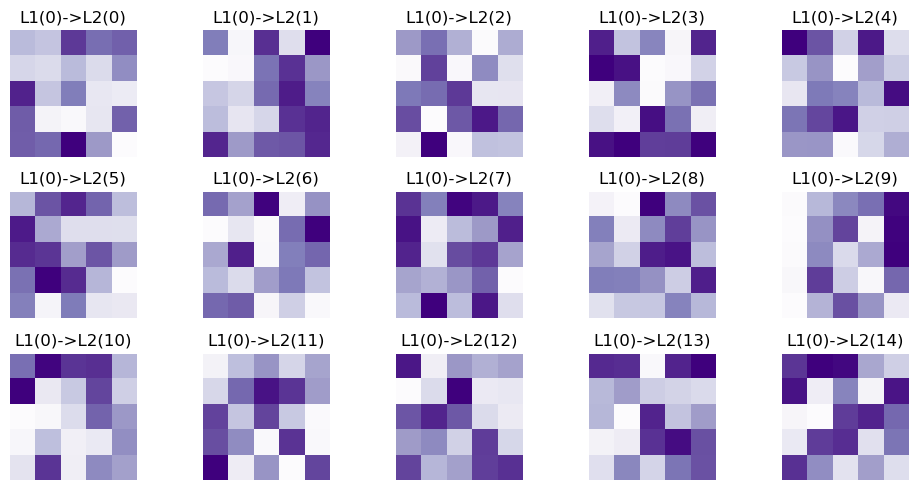

In [4]:
# what this kernels look like?
fig,axs=plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):
    ax.imshow(tr.squeeze(c.weight[0,i,:,:]).detach(),cmap="Purples")
    ax.set_title(f'L1(0)->L2({i})')
    ax.axis('off')
plt.tight_layout()
plt.show()

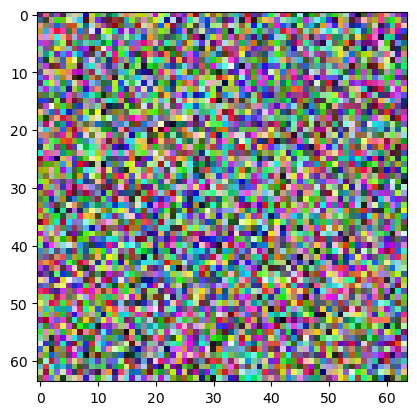

In [5]:
# Convolve with an image

### size of the image (N,RGB,Width,Height)
imsize=(1,3,64,64)
img=tr.rand(imsize)

### pytorch wants channels first, but matplotlib wants channels last
### therefore, tensors must be permuted to visualize
img2view=img.permute(2,3,1,0).numpy()
plt.imshow(np.squeeze(img2view))
plt.show()

In [6]:
# convolve the image with the filter bank (set of 'outChans' kernels)
convRes=c(img)
print(img.shape)
print(convRes.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 68, 68])


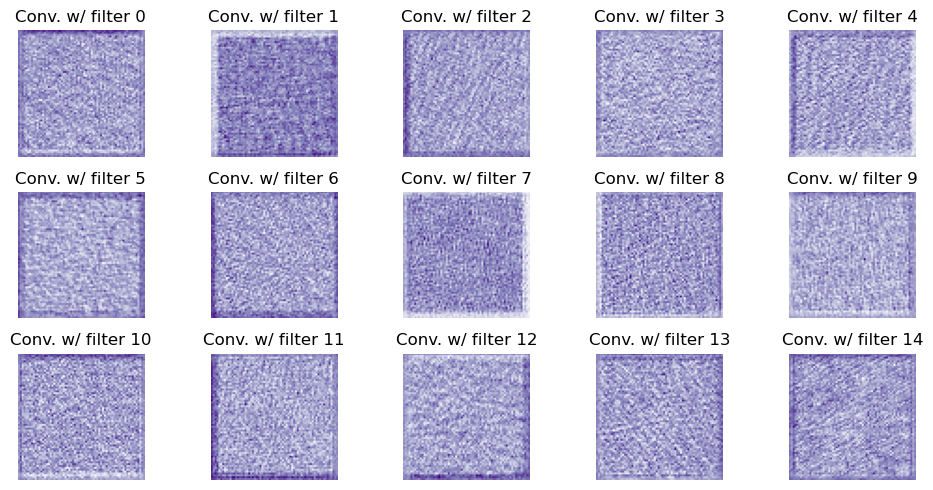

In [7]:
# what do the transpose convolved image looks like?
fig,axs=plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):
    # extract this "layer" of the convolution result:
    I=tr.squeeze(convRes[0,i,:,:]).detach()

    # and visualize it
    ax.imshow(I,cmap="Purples")
    ax.set_title(f'Conv. w/ filter {i}')
    ax.axis('off')
plt.tight_layout()
plt.show()

**Additional Explorations**<br>
Create a function to implement Transpose convolution from scratch